In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
# Reading train and test data

df_train= pd.read_csv("F:\\ipynb files\\ML Sessions\\house-prices-advanced-regression-techniques\\train.csv")
df_test= pd.read_csv("F:\\ipynb files\\ML Sessions\\house-prices-advanced-regression-techniques\\test.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [8]:
# Dropping SalePrice column from train data since it is the target variable

y = df_train['SalePrice']
df_train.drop(columns =['SalePrice'],axis =1,inplace=True)

In [9]:
# Adding a new column to both data sets and merging them

df_train['Source'] = 'Train'
df_test['Source'] ='Test'

df = df_train.append(df_test)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,Test
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,Test
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,Test
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,Test


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

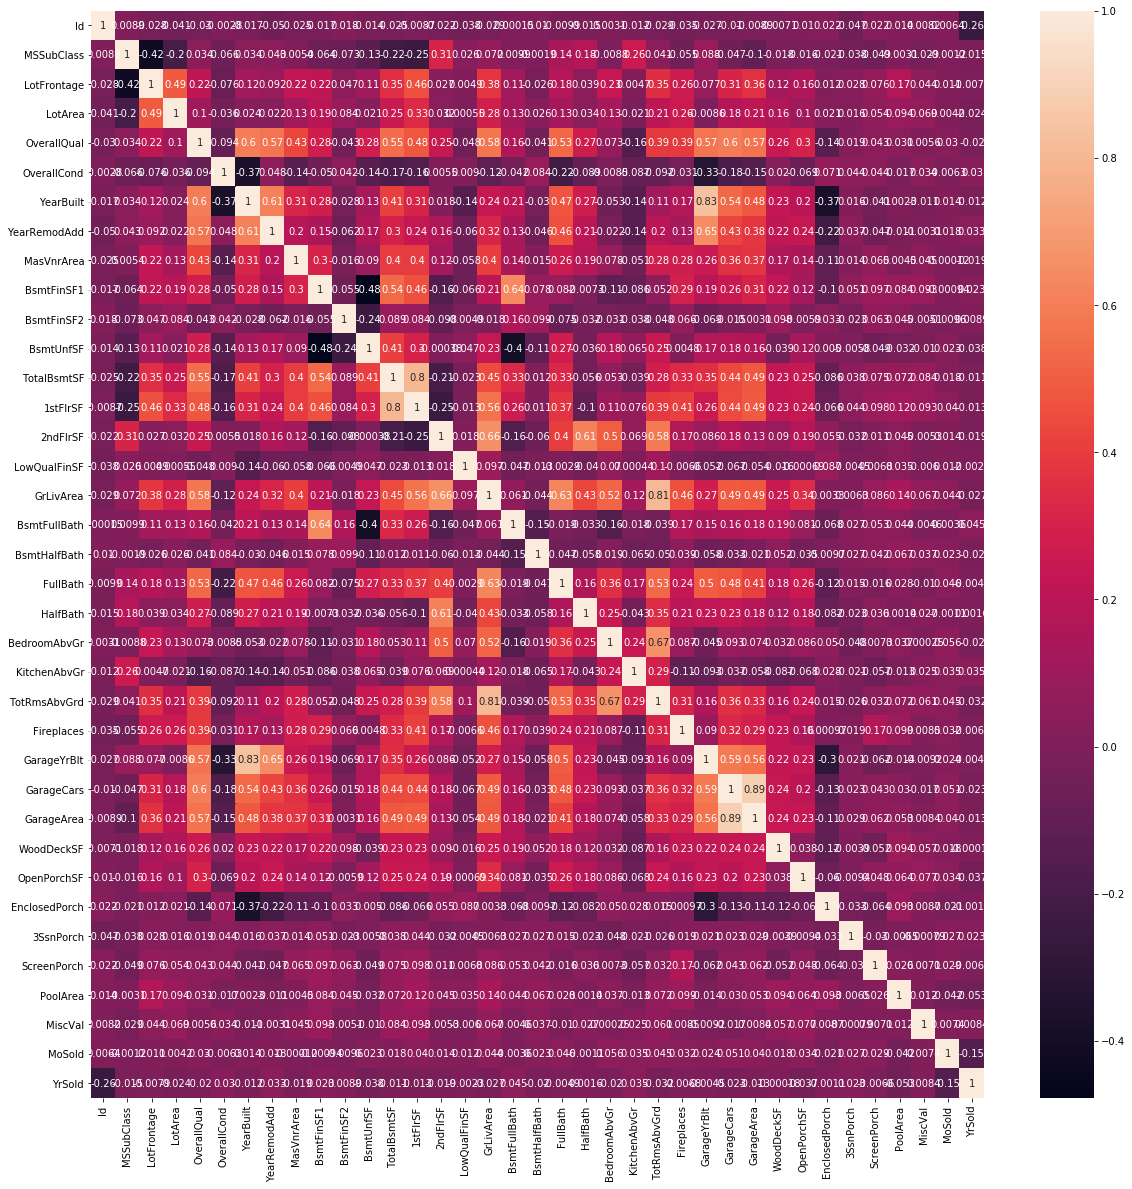

In [11]:
# Heatmap to find the correlation between the columns of both dataset

plt.figure(figsize =(20,20))
sns.heatmap(df.corr(),annot=True)

In [12]:
# Dropping columns that has max Nan

df.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','YrSold','Id','MoSold','MiscVal','PoolArea','ScreenPorch','3SsnPorch'],axis =1, inplace =True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleType,SaleCondition,Source
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,548.0,TA,TA,Y,0,61,0,WD,Normal,Train
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,460.0,TA,TA,Y,298,0,0,WD,Normal,Train
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,608.0,TA,TA,Y,0,42,0,WD,Normal,Train
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,642.0,TA,TA,Y,0,35,272,WD,Abnorml,Train
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,836.0,TA,TA,Y,192,84,0,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,NaN,NaN,Y,0,0,0,WD,Normal,Test
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,286.0,TA,TA,Y,0,24,0,WD,Abnorml,Test
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,576.0,TA,TA,Y,474,0,0,WD,Abnorml,Test
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,NaN,NaN,Y,80,32,0,WD,Normal,Test


In [13]:
# Splitting based on types

Numerical = df.select_dtypes(include = 'number')
Categorical = df.select_dtypes(exclude ='number').drop(columns=['Source'])

In [14]:
#Filling the missing values

for i in Categorical:
  df[i] = df[i].fillna(df[i].mode()[0])

for i in Numerical:
  df[i] = df[i].fillna(df[i].mean())

In [15]:
# Encoding

df = pd.get_dummies(df.select_dtypes(exclude='number'),drop_first=True)

In [16]:
df.shape

(2919, 197)

In [17]:
train = df.loc[df['Source_Train']==1]
test = df.loc[df['Source_Train']!=1]

In [18]:
train.shape,test.shape

((1460, 197), (1459, 197))

In [20]:
# Modelling

model = LinearRegression()

In [21]:
model.fit(train,y)

LinearRegression()

In [23]:
y_test = model.predict(test)
y_test


array([114727.53545259, 159573.58767956, 178787.81044154, ...,
       113239.41725308, 110875.40582702, 189775.7174005 ])

In [24]:
model.score(train,y)

0.8431494582842443

In [25]:
model.score(test,y_test)

1.0

In [27]:
df_test= pd.read_csv("F:\\ipynb files\\ML Sessions\\house-prices-advanced-regression-techniques\\test.csv")
Id = df_test['Id']

In [29]:
result = pd.DataFrame()

In [30]:
result['Id'] = Id
result['SalePrice'] = y_test

In [31]:
result

,Id,SalePrice
0,1461,114727.535453
1,1462,159573.587680
2,1463,178787.810442
3,1464,197021.696504
4,1465,194777.840128
...,...,...
1454,2915,85091.088312
1455,2916,80768.876465
1456,2917,113239.417253
1457,2918,110875.405827


In [32]:
result.to_csv('submission.csv', index = False)